# ASDS 6302 - Machine Learning and Applications

# Final Project

# Team : 7

# Name: Hariharan Selvam

# UTA ID: 1002174644

# ONLINE SHOPPERS PURCHASING INTENTION

Problem Statement: Identify the factors that will help to improve the customers count on an online shopping site.

DATASET OVERVIEW:

• Source: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

• The dataset has 12330 observations with 18 features.

• Out of these 18 features, 14 are numerical and 4 are categorical.

INFORMATION ABOUT ATTRIBUTES:

• Administrative, Administrative_Duration, Informational, Informational_Duration, 
ProductRelated, ProductRelated_Duration- number of different types of pages visited by visitor 
in that session and total time spent in each of these page categories

• BounceRates - Entering site and exits without any impact

• ExitRates - Chances of site being the last page they visited

• PageValues- Average value of web page user visited before completing an e-commerce 
transaction

• SpecialDay, - Special Day or event

• OperatingSystems , Browser , Region, TrafficType – Servers 

• Month - Months of purchase 

• Visitor Type - Type of visitors

• Weekend - Purchase of weekends

• Revenue- Revenue of the site.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [3]:
data = pd.read_csv("C:/Users/harih/Downloads/online_shoppers_intention.csv")
data.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [4]:
data.shape

(12330, 18)

# Data Preprocessing:

 Data preprocessing is the process of converting a raw data into understandable format


 # Dropping duplicates

In [5]:
data.drop_duplicates(inplace = True)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


=> After dropping the duplicates, the instances got reduced from 12330 to 12205

# Missing Values :

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
data.dropna(inplace=True)

=> There is no missing values in this dataset.

# Numerical Variables

In [8]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical variables:")
numerical_columns

Numerical variables:


['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

# Distribution of Numerical Variables

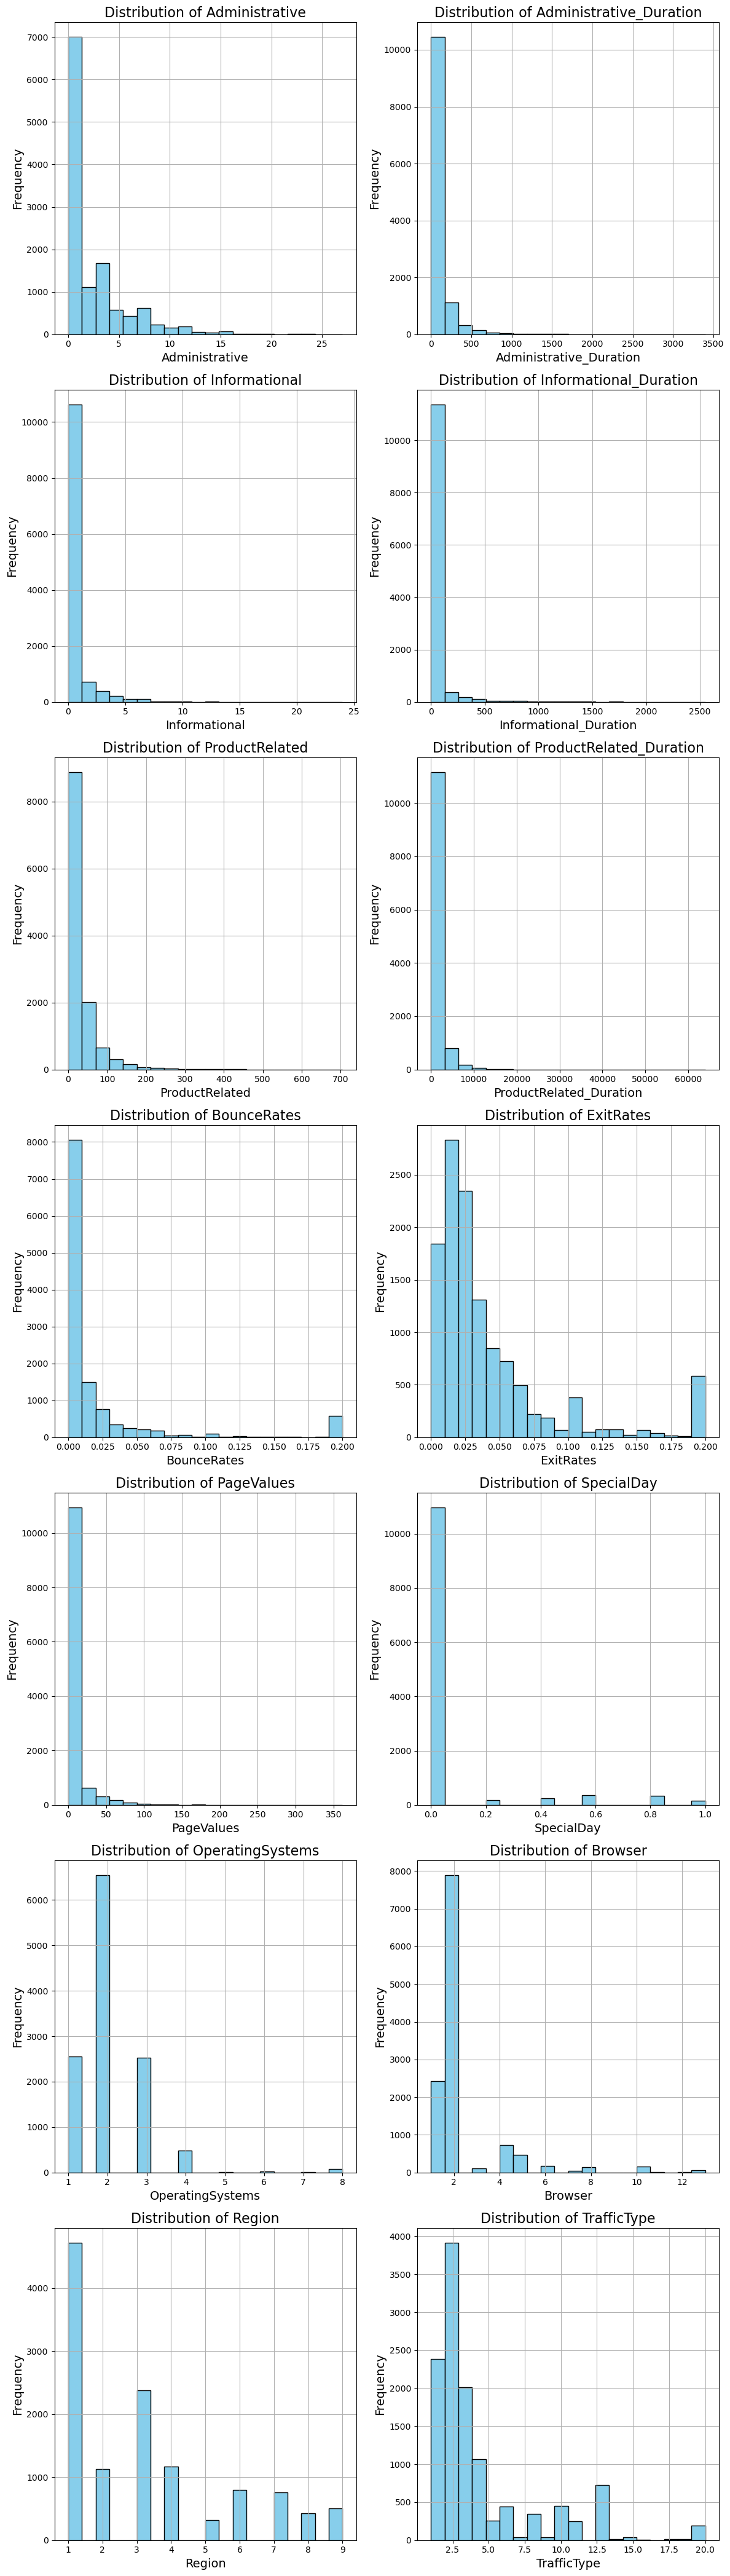

In [9]:
import matplotlib.pyplot as plt

# Determine the number of rows and columns in the collage
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Round up to the nearest integer

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# Flatten axes if necessary
if num_rows > 4:
    axes = axes.flatten()

# Plot histograms for each numerical column
for i, var in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(data[var], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {var}', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True)

# Hide any extra subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the collage
plt.show()


# Categorical Variables

In [10]:
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns.tolist()
print("categorical variables:")
categorical_columns

categorical variables:


['Month', 'VisitorType', 'Weekend', 'Revenue']

# Cardinality of Categorical Variables

In [11]:
cardinality = {var: data[var].nunique() for var in categorical_columns}

for var, count in cardinality.items():
    print(f"{var}: {count} unique values")

Month: 10 unique values
VisitorType: 3 unique values
Weekend: 2 unique values
Revenue: 2 unique values


In [12]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [13]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [14]:
data['Weekend'].unique()

array([False,  True])

In [15]:
data['Revenue'].unique()

array([False,  True])

=> Findings:

'Month' - 10 unique values ['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep','Dec']

'VisitorType' - 3 unique values ['Returning_Visitor', 'New_Visitor', 'Other']

'Weekend' - 2 unique values [False,  True]

'Revenue' - 2 unique values [False,  True]

# Detect Outliers

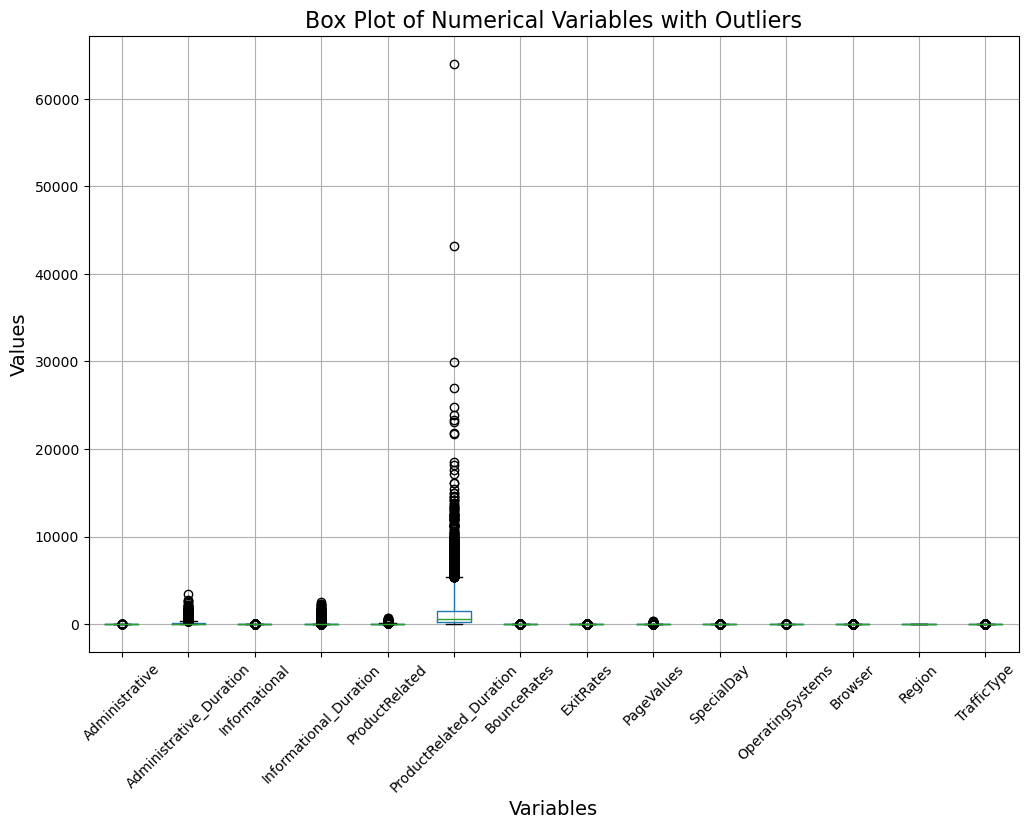

In [16]:
plt.figure(figsize=(12, 8))
data[numerical_columns].boxplot(whis=3)  
plt.title('Box Plot of Numerical Variables with Outliers', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.show()

# Remove Outliers

In [17]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[(np.abs(z_scores) <= threshold).all(axis=1)]

# Define a function to remove infrequent categories for categorical variables
def remove_infrequent_categories(data, threshold=0.05):
    categorical_columns = data.select_dtypes(include=['object']).columns
    for var in categorical_columns:
        counts = data[var].value_counts(normalize=True)
        infrequent_categories = counts[counts < threshold].index
        data[var] = data[var].apply(lambda x: np.nan if x in infrequent_categories else x)
    return data.dropna()

# Remove outliers from numerical variables
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_vars] = remove_outliers_zscore(data[numerical_columns])

# Remove infrequent categories from categorical variables
data = remove_infrequent_categories(data)


=> After removing outliers, instances got reduced from 12205 to 7667.

# Data Description

In [18]:
data.shape

(7667, 18)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 185 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           7667 non-null   float64
 1   Administrative_Duration  7667 non-null   float64
 2   Informational            7667 non-null   float64
 3   Informational_Duration   7667 non-null   float64
 4   ProductRelated           7667 non-null   float64
 5   ProductRelated_Duration  7667 non-null   float64
 6   BounceRates              7667 non-null   float64
 7   ExitRates                7667 non-null   float64
 8   PageValues               7667 non-null   float64
 9   SpecialDay               7667 non-null   float64
 10  Month                    7667 non-null   object 
 11  OperatingSystems         7667 non-null   float64
 12  Browser                  7667 non-null   float64
 13  Region                   7667 non-null   float64
 14  TrafficType          

In [20]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
185,0.0,0.000000,0.0,0.0,20.0,927.450000,0.011111,0.027249,8.000741,0.0,Mar,1.0,1.0,3.0,1.0,Returning_Visitor,False,False
186,2.0,9.000000,0.0,0.0,50.0,836.800000,0.000000,0.006340,0.000000,0.0,Mar,2.0,2.0,3.0,2.0,Returning_Visitor,False,False
187,10.0,293.778205,2.0,153.0,96.0,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3.0,2.0,6.0,2.0,Returning_Visitor,True,False
188,9.0,111.500000,1.0,48.5,49.0,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2.0,2.0,7.0,2.0,Returning_Visitor,False,True
189,3.0,47.000000,1.0,51.0,68.0,3008.124108,0.007143,0.016728,46.530175,0.0,Mar,2.0,2.0,1.0,1.0,Returning_Visitor,False,False


In [21]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000
mean,1.951220,58.246661,0.343942,15.092425,27.119734,1022.185528,0.011053,0.033934,4.012948,0.035581,2.087779,2.125995,3.091822,3.824964
std,2.680133,98.316615,0.831015,51.616736,27.726564,1143.691700,0.020756,0.029579,10.774112,0.129244,0.758285,1.065693,2.365819,3.444485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,220.442424,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,4.000000,0.000000,0.000000,18.000000,615.816667,0.000766,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,80.833333,0.000000,0.000000,35.000000,1399.794481,0.013333,0.042857,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,12.000000,606.000000,4.000000,451.500000,165.000000,6919.899495,0.155556,0.177778,61.808436,0.600000,4.000000,7.000000,9.000000,16.000000


# Exploratory Data Analysis:

• Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns and insights 
in data.

# Correlation Heatmap:

 Correlation heatmap is created for numerical variables to gain insights.


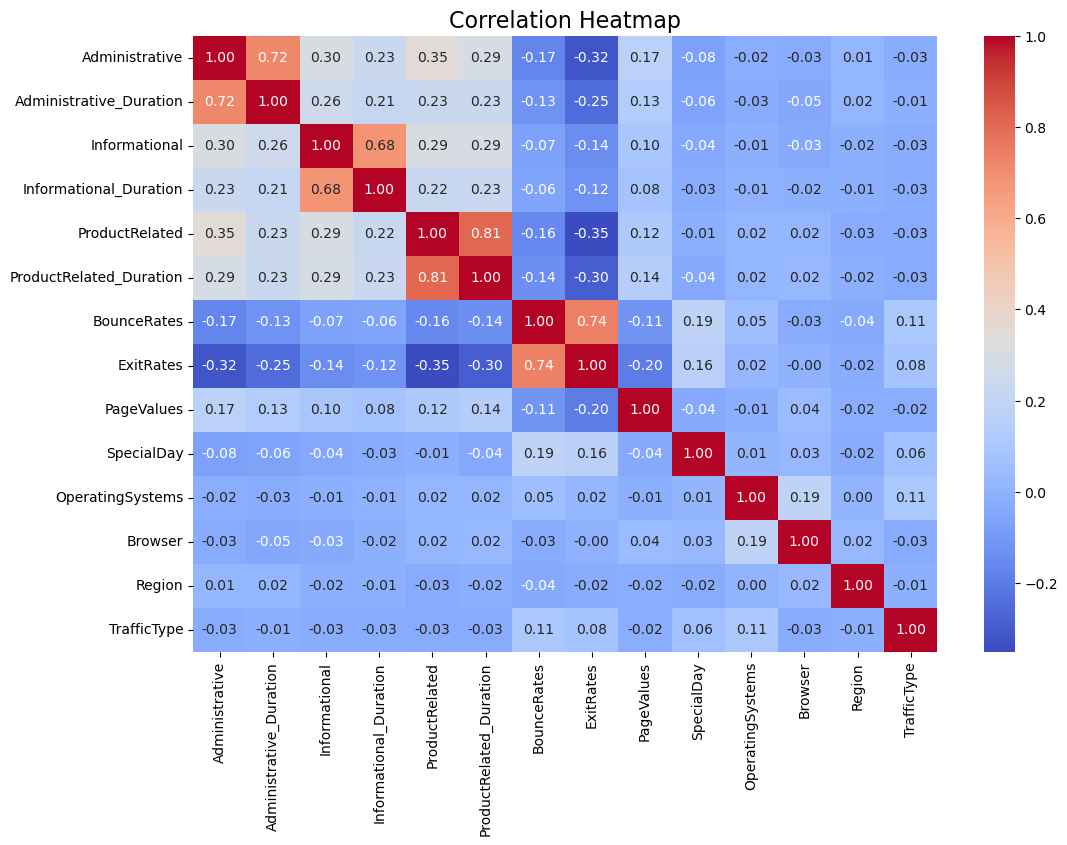

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


 With the help of correlation matrix, I got to know that
 
• There is a strong positive correlation between

➢ Administrative and Administrative_Duration 

➢ ProductRelated and ProductRelated_Duration.

➢ Bounce Rates and Exit Rates

----------------------------------------------------------------------------------------
• There is a moderate positive correlation between

➢ Informational and ProductRelated 

➢ Administrative and Informational 

➢ Administrative and ProductRelated 

➢ Administrative and PageValues 

-------------------------------------------------------------------------------------------
• There is a weak negative correlation between

➢ ProductRelated and Bounce Rates 

➢ ProductRelated and Exit Rates 

➢ Informational and Bounce Rates 

➢ Informational and Exit Rates

# Stacked Bar plot

A stacked bar plot is a type of chart that represents data in rectangular bars, with each bar 
subdivided into segments that represent different categories or groups.

<Figure size 1000x600 with 0 Axes>

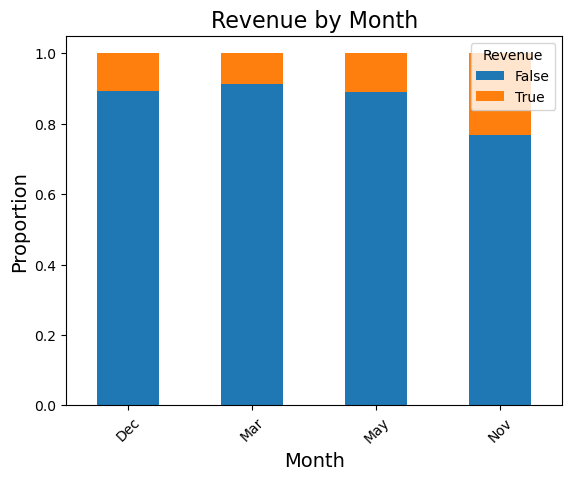

<Figure size 1000x600 with 0 Axes>

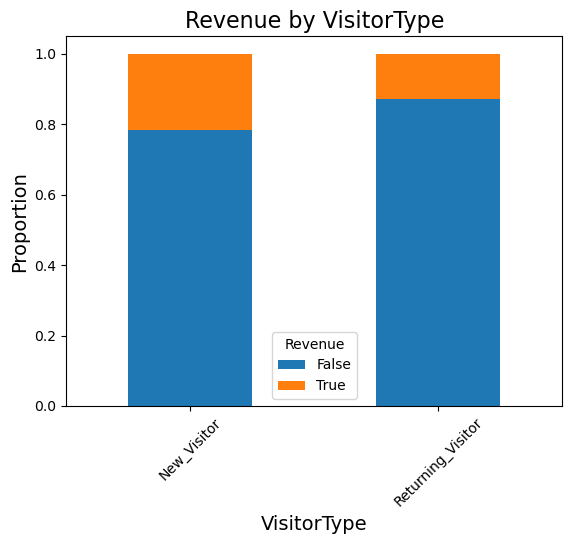

<Figure size 1000x600 with 0 Axes>

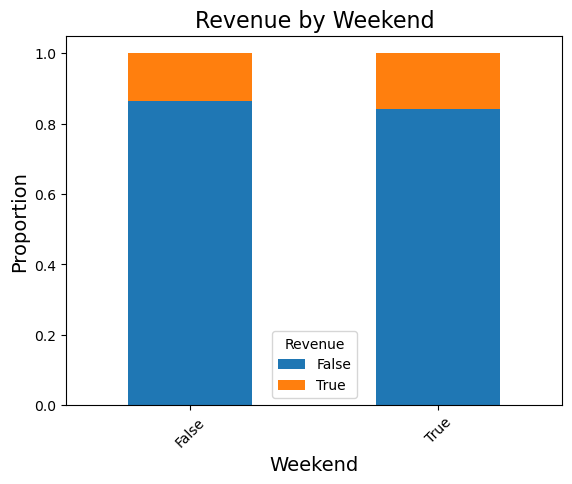

In [23]:
import matplotlib.pyplot as plt

# Define a function to plot bar charts for categorical variables
def plot_bar_chart(data, x_variable, y_variable):
    plt.figure(figsize=(10, 6))
    data.groupby(x_variable)[y_variable].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title(f'{y_variable} by {x_variable}', fontsize=16)
    plt.xlabel(x_variable, fontsize=14)
    plt.ylabel('Proportion', fontsize=14)
    plt.legend(title=y_variable)
    plt.xticks(rotation=45)
    plt.show()

# Plot bar charts for each categorical variable
categorical_columns = ['Month', 'VisitorType', 'Weekend', 'Revenue']
for column in categorical_columns:
    if column != 'Revenue':
        plot_bar_chart(data, column, 'Revenue')


# Histogram:

 A histogram is a graphical representation of the distribution of numerical data.

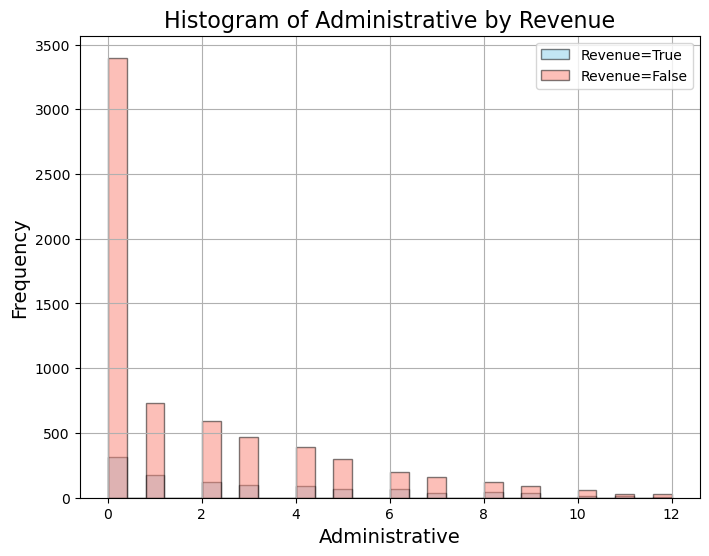

<Figure size 640x480 with 0 Axes>

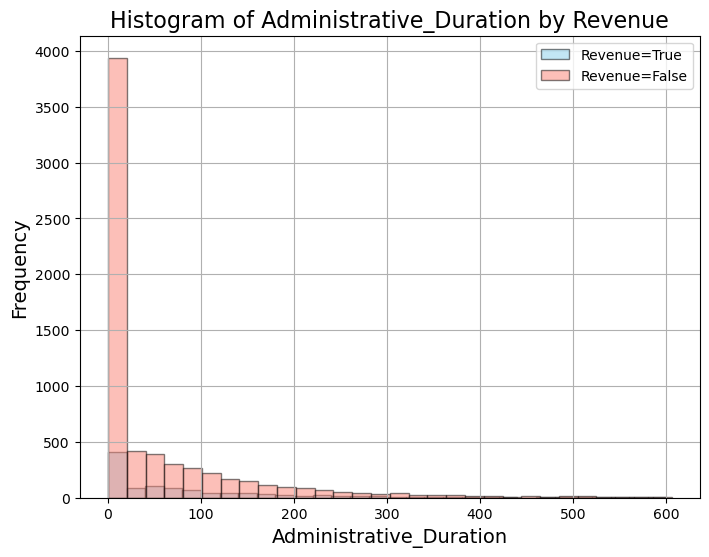

<Figure size 640x480 with 0 Axes>

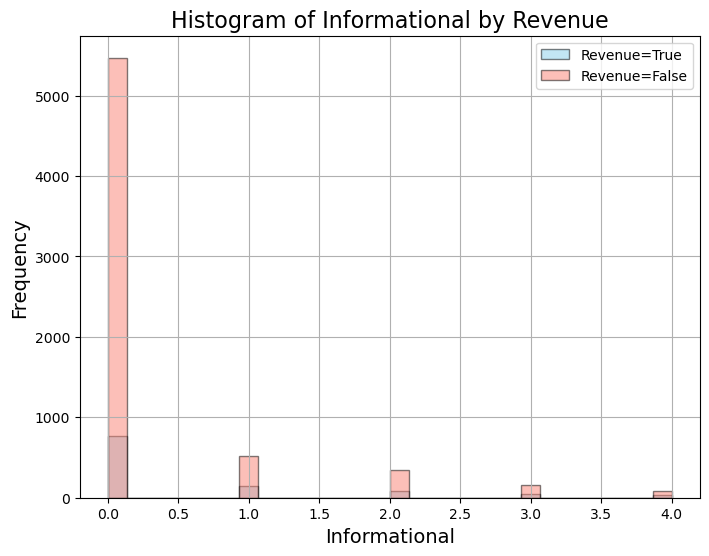

<Figure size 640x480 with 0 Axes>

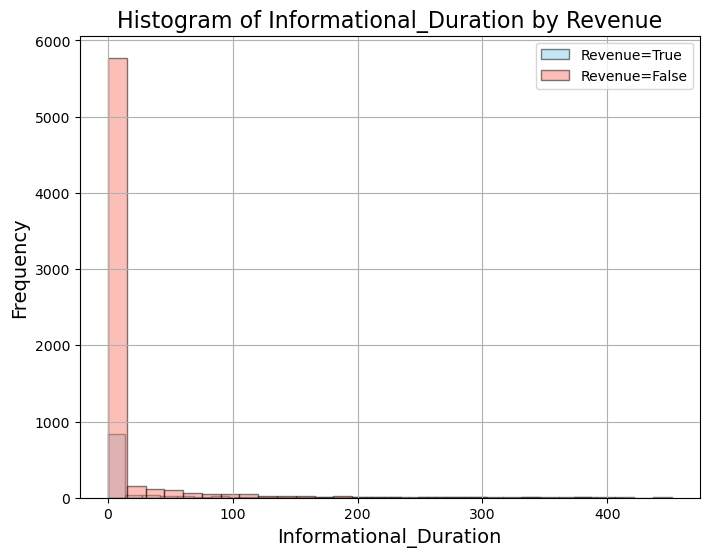

<Figure size 640x480 with 0 Axes>

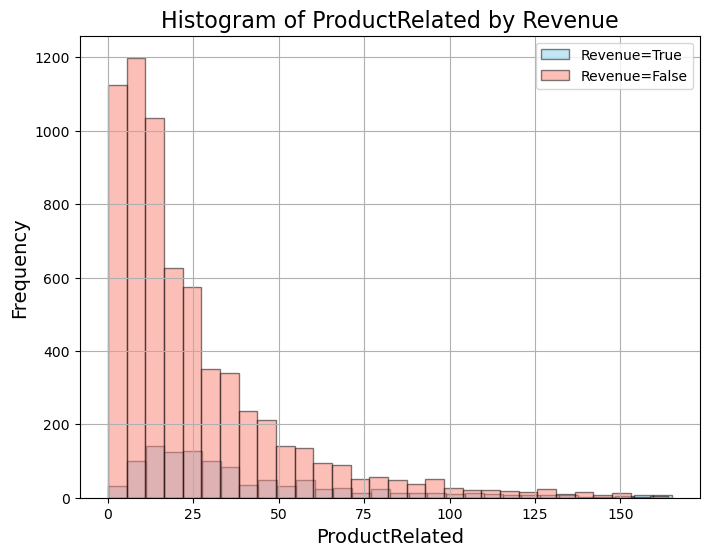

<Figure size 640x480 with 0 Axes>

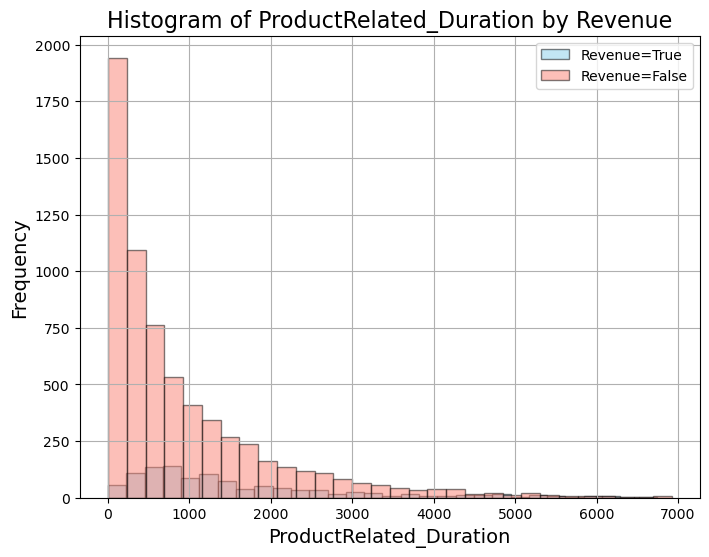

<Figure size 640x480 with 0 Axes>

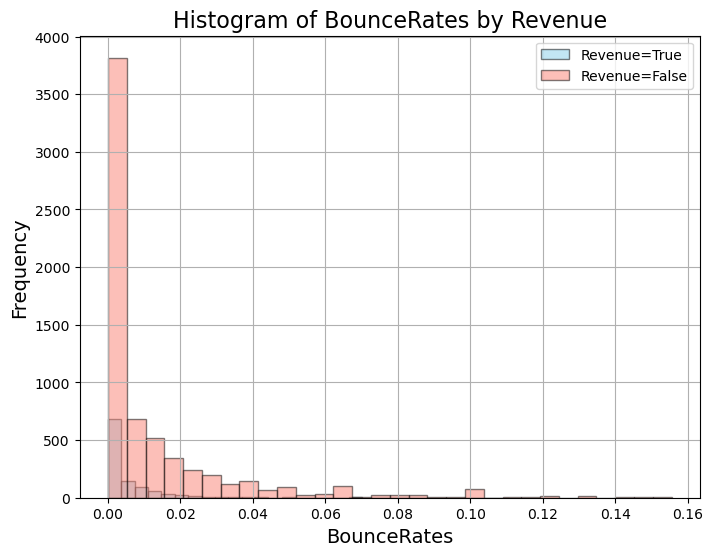

<Figure size 640x480 with 0 Axes>

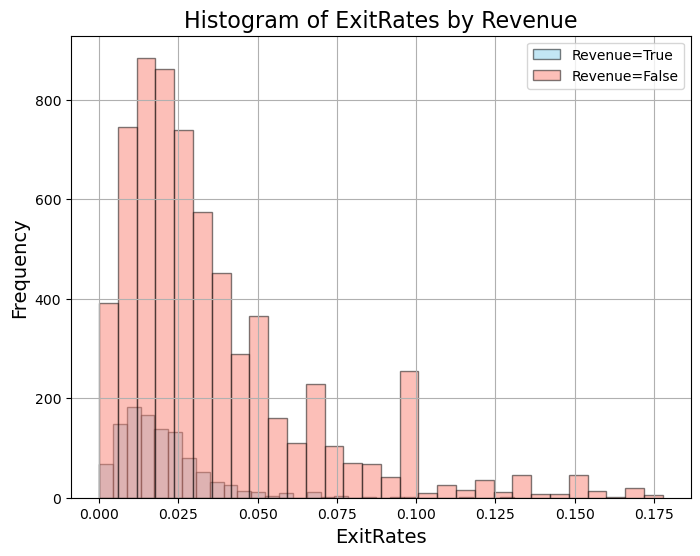

<Figure size 640x480 with 0 Axes>

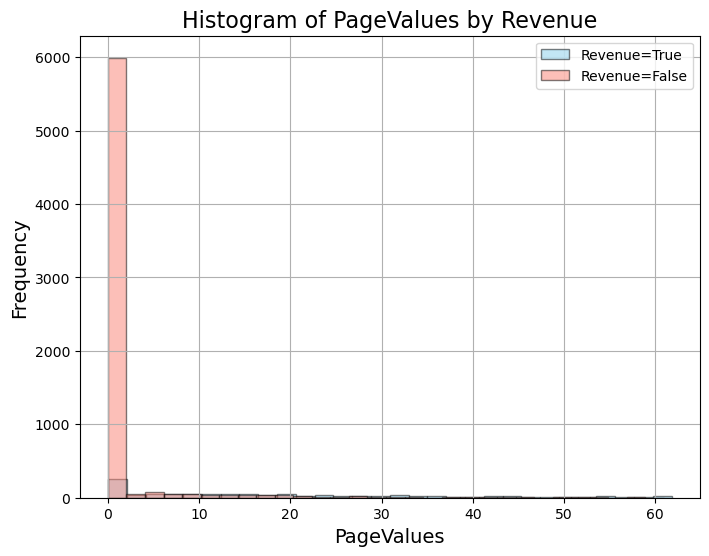

<Figure size 640x480 with 0 Axes>

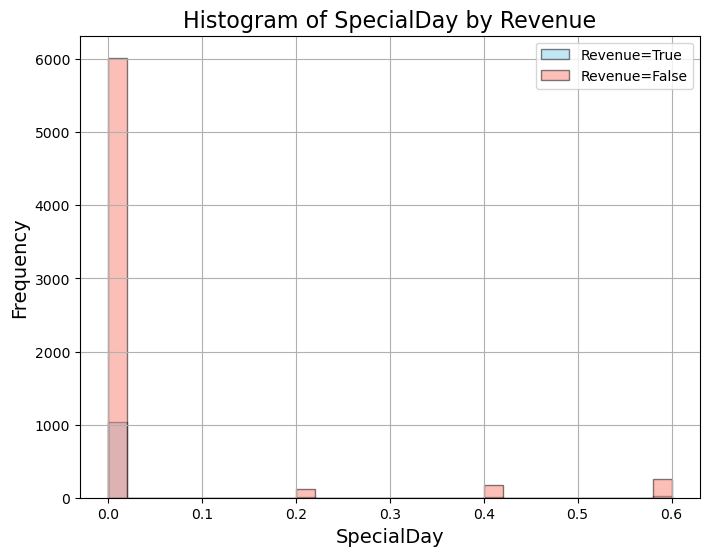

<Figure size 640x480 with 0 Axes>

In [24]:


numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 
                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[data['Revenue'] == True][column], bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Revenue=True')
    plt.hist(data[data['Revenue'] == False][column], bins=30, color='salmon', edgecolor='black', alpha=0.5, label='Revenue=False')
    plt.title(f'Histogram of {column} by Revenue', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig("jpg")
    

Valuable Insights:

• From the Exploratory Data Analysis, I got some insights.

• websites with high informational content tend to also have users who spend more time on 
informational pages

• websites with more product-related content might have slightly lower bounce rates and exit 
rates.

• websites with high bounce rates also tend to have high exit rates

• website features might have a small positive impact on user behavior.type of traffic a website 
receives might influence the administrative tasks associated with managing that traffic

• Returning visitors help for revenue more than new visitors, which is one of the positives for the
websites.


# Model Building

• Here, I’m going to build Logistic Regression and Support Vector Machine Classification models.

• Target :Revenue
    
• Features: All other attributes.
    
• Train – test ratio: 70:30

In [25]:
# Drop samples with missing values
data.dropna(inplace=True)



C:\Users\harih\AppData\Local\Temp\ipykernel_26352\3287450691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [26]:
# Split the data into features and target variable
X = data.drop('Revenue', axis=1)
y = data['Revenue']



In [27]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)



In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4644)



In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Logistic Regression:

Logistic regression is a statistical model used for binary classification tasks, where the target 
variable has two possible outcomes or classes.

In [30]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)



# Support Vector Machines:

Support Vector Machines (SVMs) are supervised learning models used for classification and regression 
tasks.


In [31]:
# Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)




In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))
    print(f"Confusion Matrix for {model_name}:")
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(conf_matrix)
    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()




# Evaluation of Logistic Regression:

Logistic Regression Accuracy: 0.90
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      1317
        True       0.77      0.44      0.56       217

    accuracy                           0.90      1534
   macro avg       0.84      0.71      0.75      1534
weighted avg       0.89      0.90      0.89      1534

Confusion Matrix for Logistic Regression:
[[1288   29]
 [ 122   95]]


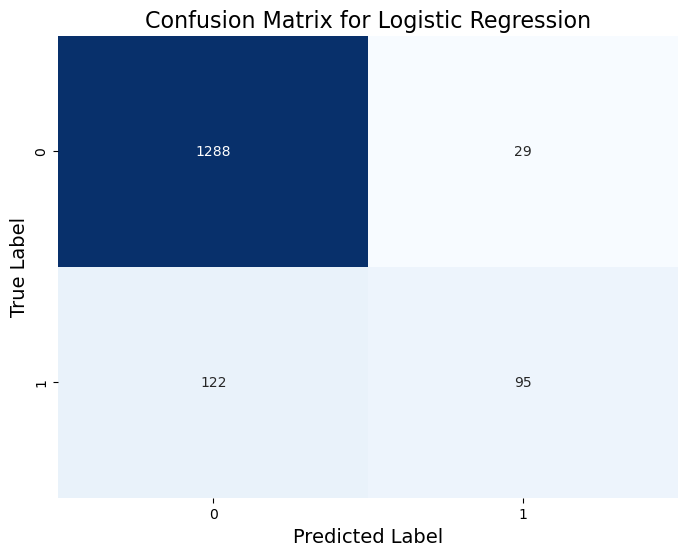

In [33]:

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")


From the confusion matrix,

1288 – Correctly classified True Positive

• 29 – Incorrectly Classified False Positive

• 122- Incorrectly Classified False Negative

• 95 – Correctly classified True Negative

# ROC curve for Logistic Regression

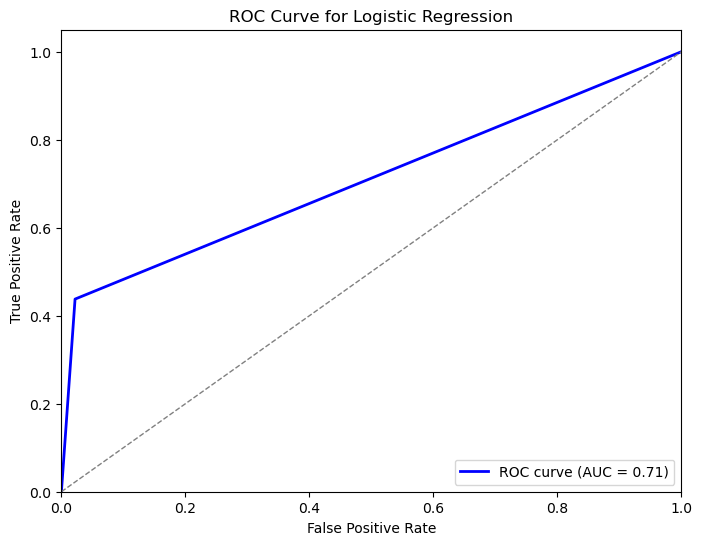

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


Here, I got the ROC curve with AUC value of 0.71

which proves that the model has a pretty good performance on the dataset.


# Evaluation of Support Vector Machines :

Support Vector Machine (SVM) Accuracy: 0.90
Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      1317
        True       0.73      0.44      0.55       217

    accuracy                           0.90      1534
   macro avg       0.82      0.71      0.74      1534
weighted avg       0.89      0.90      0.89      1534

Confusion Matrix for Support Vector Machine (SVM):
[[1281   36]
 [ 122   95]]


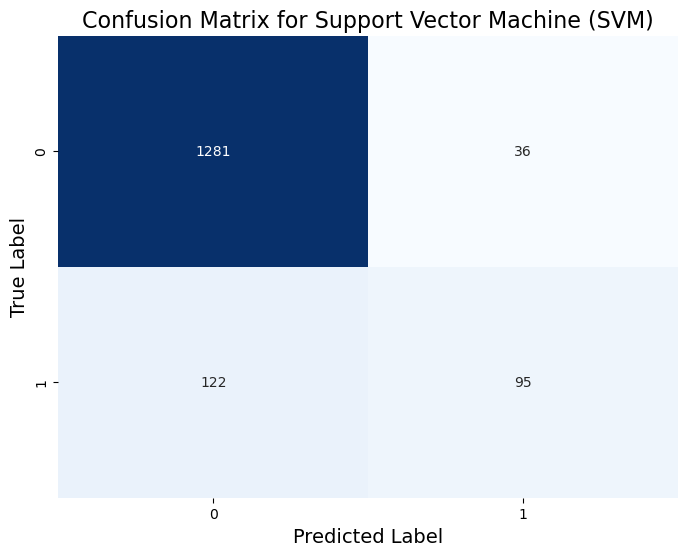

In [34]:
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")

From the confusion matrix,

1281 – Correctly classified True Positive

36 – Incorrectly classified False positive

122-Incorrectly classified False negative

95 – Correctly classified True negative


# ROC curve for Support Vector Machines:

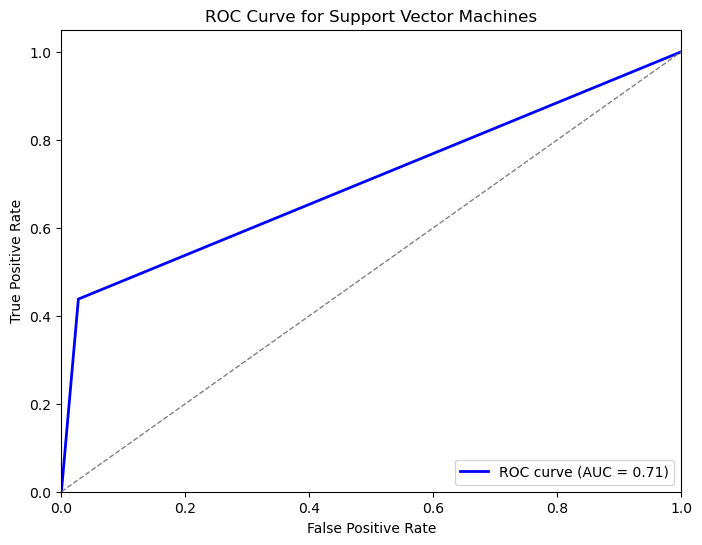

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machines')
plt.legend(loc='lower right')
plt.show()


Here, I got an ROC curve with AUC value of 0.71


# Conclusion:

Both Logistic Regression and Support Vector Machines perform in a similar manner.

But I would like to go with Logistic Regression as my best fitted model

Pagevalues, visitortype, special day, month, weekend will help to improve revenue for online 
shopping site.

These features capture various aspects of user behaviour, engagement and timing which will be 
crucial for marketing strategies.

# Future Recommendation:

Leverage Recommendation engines.

Seasonal promotions and discounts

Time based promotions

SEO and Social Media Advertising

Landing page optimization

Technical operation and user interface

Newcomer and referral discounts

Personalized e-mail retargeting

# Reference:

Informatory paper:

https://www.semanticscholar.org/paper/Real-time-prediction-of-online-shoppers%E2%80%99-
purchasing-Sakar-Polat/747e098f85ca2d20afd6313b11242c0c427e6fb3



